In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('bill_authentication.csv')
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,1


In [3]:
x=data.iloc[:,:-1].values
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [6]:
y=data.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [12]:
'''from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)'''

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)


DecisionTreeClassifier()

In [32]:
y_pred=classifier.predict(x_test)
print(y_pred)
s=0
for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
        s+=1
print((s*100)/len(y_pred))

[0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1
 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1
 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1]
94.9090909090909


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)*100
print(accuracy)
print(classification_report(y_test,y_pred))

[[144   5]
 [  9 117]]
94.9090909090909
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       149
           1       0.96      0.93      0.94       126

    accuracy                           0.95       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275



[Text(0.5041454081632653, 0.9666666666666667, 'x[0] <= -0.218\ngini = 0.494\nsamples = 1097\nvalue = [611, 486]'),
 Text(0.3692602040816326, 0.9, 'x[1] <= 1.283\ngini = 0.297\nsamples = 468\nvalue = [85, 383]'),
 Text(0.30994897959183676, 0.8333333333333334, 'x[1] <= 0.935\ngini = 0.179\nsamples = 422\nvalue = [42, 380]'),
 Text(0.23214285714285715, 0.7666666666666667, 'x[2] <= 1.11\ngini = 0.152\nsamples = 399\nvalue = [33, 366]'),
 Text(0.11734693877551021, 0.7, 'x[3] <= -0.247\ngini = 0.075\nsamples = 280\nvalue = [11, 269]'),
 Text(0.10374149659863946, 0.6333333333333333, 'gini = 0.0\nsamples = 83\nvalue = [0, 83]'),
 Text(0.13095238095238096, 0.6333333333333333, 'x[1] <= 0.347\ngini = 0.105\nsamples = 197\nvalue = [11, 186]'),
 Text(0.11734693877551021, 0.5666666666666667, 'x[3] <= -0.244\ngini = 0.088\nsamples = 195\nvalue = [9, 186]'),
 Text(0.10374149659863946, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13095238095238096, 0.5, 'x[2] <= -0.603\ngini = 0.079\nsample

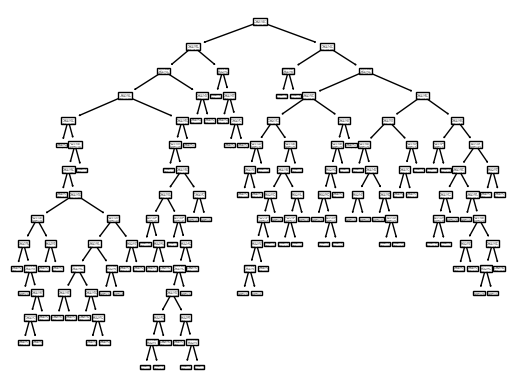

In [35]:
from sklearn import tree
tree.plot_tree(classifier)